## Data Loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
import numpy as np

# Import libraries for running ANOVA and post-hoc test
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
#from an excel file --- need to install openpyxl dependency

#from github
username = "datagus"
repository = "ASDA2025"
directory = "datasets/homework_week5/world_bank_development_indicators.csv"
github_url = f"https://raw.githubusercontent.com/{username}/{repository}/main/{directory}"
indicators_df = pd.read_csv(github_url)

In [ ]:
#from github
username = "datagus"
repository = "ASDA2025"
directory = "datasets/homework_week5/income.xlsx"
github_url = f"https://raw.githubusercontent.com/{username}/{repository}/main/{directory}"
income_xls = pd.ExcelFile(github_url)

In [ ]:
# Check column names of the indicators dataframe
indicators_df.columns

In [ ]:
# Preview the indicators dataframe
indicators_df.head()

In [ ]:
# Get a concise summary of the dataframe
indicators_df.info()

## Data Cleansing and Merging

In [ ]:
# Drop redundant columns, columns showing statistical output (not indicator itself), columns with high sparsity and technically complex or irrelevant indicators
columns_to_drop = [
# 1.Redundant and statistical columns (8 Columns)    
    'control_of_corruption_std',
    'goverment_effectiveness_std',
    'political_stability_std',
    'rule_of_law_std',
    'regulatory_quality_std',
    'voice_and_accountability_std',
    'other_greenhouse_emisions',  
    'land_area',                 

# 2. Columns with high missing values (10 Columns)
    'human_capital_index',
    'doing_business',
    'time_to_get_operation_license',
    'multidimensional_poverty_headcount_ratio%',
    'statistical_performance_indicators',
    'logistic_performance_index',
    'central_goverment_debt%',
    'gini_index',
    'risk_premium_on_lending',
    'research_and_development_expenditure%',

# 3. Irrelevent Indicators (12 Columns)
    'avg_precipitation',          
    'trade_in_services%',         
    'real_interest_rate',         
    'expense%',                   
    'electric_power_consumption', 
    'individuals_using_internet%',
    'military_expenditure%', 
    'regulatory_quality_estimate', 
    'birth_rate',                 
    'death_rate',                 
    'rural_population',         
    'intentional_homicides'       
]

# Create the clean DataFrame by dropping the columns
cleanindicators_df = indicators_df.drop(columns=columns_to_drop)

# Get a concise summary of the cleaned dataframe
cleanindicators_df.info()

In [ ]:
# Preview the cleaned indicators dataframe
cleanindicators_df.head()

In [ ]:
# List all sheets of income excel file
print(income_xls.sheet_names)

In [ ]:
# Parse and create the different dataframes:
economies_df = income_xls.parse('List of economies')
#composition_df = income_xls.parse('composition')

In [ ]:
# Preview the economies dataframe
economies_df.info()

In [ ]:
# Drop rows with missing 'Region' values
economies_df.dropna(subset=['Region'], inplace=True)
economies_df.info()

In [ ]:
# Preview the economies dataframe
economies_df.head()

In [ ]:
# Unique country names from economies_df
unique_economies = economies_df['Economy'].unique()

# Unique country names from cleanindicators_df
unique_indicators = cleanindicators_df['country'].unique()

print("Unique countries in economies_df:", len(unique_economies))
print(unique_economies[:20])  # show first 20 for preview

print("\nUnique countries in cleanindicators_df:", len(unique_indicators))
print(unique_indicators[:20])

In [ ]:
# Convert to sets
set_econ = set(economies_df['Economy'])
set_ind = set(cleanindicators_df['country'])

# Find differences
only_in_economies = set_econ - set_ind
only_in_indicators = set_ind - set_econ

print("Countries only in economies_df (not in cleanindicators_df):", len(only_in_economies))
print(sorted(list(only_in_economies))[:20])  # show first 20

print("\nCountries only in cleanindicators_df (not in economies_df):", len(only_in_indicators))
print(sorted(list(only_in_indicators)))


In [ ]:
# Remove aggregate groups from cleanindicators_df
groups_to_remove = [
    'Africa Eastern and Southern', 'Africa Western and Central', 'Arab World',
    'Caribbean small states', 'Central Europe and the Baltics', 'Early-demographic dividend',
    'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)',
    'East Asia & Pacific (IDA & IBRD)', 'East Asia & Pacific (excluding high income)',
    'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD countries)',
    'Europe & Central Asia (IDA & IBRD)', 'Europe & Central Asia (excluding high income)',
    'European Union', 'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)', 'High income', 'IBRD only',
    'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total',
    'Late-demographic dividend', 'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Latin America & Caribbean (IDA & IBRD)', 'Least developed countries: UN classification',
    'Low & middle income', 'Low income', 'Lower middle income',
    'Middle East, North Africa, Afghanistan and Pakistan',
    'Middle East, North Africa, Afghanistan and Pakistan (excluding high income)',
    'Middle East, North Africa, Afghanistan and Pakistan (IDA & IBRD)',
    'Middle income', 'North America', 'OECD members', 'Other small states',
    'Pacific island small states', 'Post-demographic dividend', 'Pre-demographic dividend',
    'Small states', 'South Asia', 'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
    'Sub-Saharan Africa (IDA & IBRD)', 'Upper middle income', 'World', 'Middle East & North Africa', 'Middle East & North Africa (IDA & IBRD countries)',
    'Middle East & North Africa (IDA & IBRD)',
    'Middle East & North Africa (excluding high income)',
    'Not classified','Sub-Saharan Africa (IDA & IBRD countries)','Latin America & the Caribbean (IDA & IBRD countries)'
]

# Filter out the groups from cleanindicators_df
cleanindicators_df = cleanindicators_df[~cleanindicators_df['country'].isin(groups_to_remove)]

# Print remaining unique countries
print("Remaining unique countries:", cleanindicators_df['country'].nunique())

# Convert to sets
set_econ = set(economies_df['Economy'])
set_ind = set(cleanindicators_df['country'])

# Find differences
only_in_economies = set_econ - set_ind
only_in_indicators = set_ind - set_econ

print("\nCountries only in economies_df (not in cleanindicators_df):", len(only_in_economies))
print(sorted(list(only_in_economies))[:20])  # show first 20

print("\nCountries only in cleanindicators_df (not in economies_df):", len(only_in_indicators))
print(sorted(list(only_in_indicators)))


In [ ]:
# Mapping accented names to simpler names
economies_name_mapping = {
    "Curaçao": "Curacao",
    "Côte d’Ivoire": "Cote d'Ivoire",
    "Puerto Rico (U.S.)": "Puerto Rico",
    "Somalia, Fed. Rep.": "Somalia",
    "São Tomé and Príncipe": "Sao Tome and Principe",
    "Türkiye": "Turkey",
    "Czechia": "Czech Republic"  # optional depending on your cleanindicators_df
}

economies_df['Economy'] = economies_df['Economy'].replace(economies_name_mapping)

# Drop the entry
economies_df = economies_df[economies_df['Economy'] != "Taiwan, China"]

# Convert to sets
set_econ = set(economies_df['Economy'])
set_ind = set(cleanindicators_df['country'])

# Find differences
only_in_economies = set_econ - set_ind
only_in_indicators = set_ind - set_econ

print("Countries only in economies_df (not in cleanindicators_df):", len(only_in_economies))
print(sorted(list(only_in_economies))[:20])  # show first 20

print("\nCountries only in cleanindicators_df (not in economies_df):", len(only_in_indicators))
print(sorted(list(only_in_indicators)))



In [ ]:
# Check data in specific country names
variant_names = ['Czechia', 'Turkiye', 'Viet Nam']

# Show non-NA counts per column for these rows
print(cleanindicators_df[cleanindicators_df['country'].isin(variant_names)].info())



In [ ]:
# Check data in specific country names 
variant_names = ['Czech Republic', 'Turkey', 'Vietnam']

# Show non-NA counts per column for these rows
print(cleanindicators_df[cleanindicators_df['country'].isin(variant_names)].info())



In [ ]:
# List of countries to remove
countries_to_remove = ['Czech Republic', 'Turkey', 'Vietnam']

# Keep only rows where country is NOT in the list
cleanindicators_df = cleanindicators_df[~cleanindicators_df['country'].isin(countries_to_remove)]

# Define the mapping
name_mapping = {
    'Czechia': 'Czech Republic',
    'Turkiye': 'Turkey',
    'Viet Nam': 'Vietnam'
}

# Apply the mapping
cleanindicators_df['country'] = cleanindicators_df['country'].replace(name_mapping)

# Convert to sets
set_econ = set(economies_df['Economy'])
set_ind = set(cleanindicators_df['country'])

# Find differences
only_in_economies = set_econ - set_ind
only_in_indicators = set_ind - set_econ

print("Countries only in economies_df (not in cleanindicators_df):", len(only_in_economies))
print(sorted(list(only_in_economies))[:20])  # show first 20

print("\nCountries only in cleanindicators_df (not in economies_df):", len(only_in_indicators))
print(sorted(list(only_in_indicators)))


In [ ]:
cols_to_check = [
    'agricultural_land%', 'forest_land%', 'control_of_corruption_estimate', 'access_to_electricity%',
    'renewvable_energy_consumption%', 'CO2_emisions', 'population_density', 'inflation_annual%',
    'tax_revenue%', 'goverment_effectiveness_estimate', 'GDP_current_US', 'political_stability_estimate',
    'rule_of_law_estimate', 'government_expenditure_on_education%', 'government_health_expenditure%',
    'life_expectancy_at_birth', 'voice_and_accountability_estimate' , 'population'
]

total_rows = len(cleanindicators_df)

for col in cols_to_check:
    non_numeric_count = pd.to_numeric(cleanindicators_df[col], errors='coerce').isna().sum()
    non_numeric_percent = (non_numeric_count / total_rows) * 100
    print(f"{col}: {non_numeric_percent:.2f}% non-numeric values")


In [ ]:
# Columns to bring in from economies_df
columns_to_add = ['Economy', 'Code', 'Region', 'Income group', 'Lending category']

# Merge
merged_df = cleanindicators_df.merge(
    economies_df[columns_to_add],
    how='left',
    left_on='country',
    right_on='Economy'
)

# Drop duplicate 'Economy' column
merged_df.drop(columns=['Economy'], inplace=True)

# Move the new columns right after 'country'
for i, col in enumerate(['Code', 'Region', 'Income group', 'Lending category']):
    merged_df.insert(i+1, col, merged_df.pop(col))

# Check
merged_df.head()


In [ ]:
# Check datatypes in merged dataframe
print(merged_df.dtypes)


In [ ]:
# Checking missing values before imputation

columns_to_impute = [
    'agricultural_land%',
    'forest_land%',
    'control_of_corruption_estimate',
    'access_to_electricity%',
    'renewvable_energy_consumption%',
    'CO2_emisions',
    'population_density',
    'inflation_annual%',
    'tax_revenue%',
    'goverment_effectiveness_estimate',
    'GDP_current_US',
    'rule_of_law_estimate',
    'government_expenditure_on_education%',
    'government_health_expenditure%',
    'life_expectancy_at_birth',
    'voice_and_accountability_estimate', 'political_stability_estimate' , 'population'
]

missing_before = merged_df[columns_to_impute].isna().sum()
print("Missing values BEFORE imputation:")
print(missing_before)

In [ ]:
# Imputing missing values using the median value of the same country's indicator

for col in columns_to_impute:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Impute missing values per country using median
for col in columns_to_impute:
    merged_df[col] = merged_df[col].fillna(
        merged_df.groupby('country')[col].transform('median')
    )

# Check remaining missing values
missing_after = merged_df[columns_to_impute].isna().sum()
print("Missing values after imputation:")
print(missing_after)

In [ ]:
# List of columns to check for missing values
columns_to_check = [
    'agricultural_land%',
    'forest_land%',
    'control_of_corruption_estimate',
    'access_to_electricity%',
    'renewvable_energy_consumption%',
    'CO2_emisions',
    'population_density',
    'inflation_annual%',
    'tax_revenue%',
    'goverment_effectiveness_estimate',
    'GDP_current_US',
    'rule_of_law_estimate',
    'government_expenditure_on_education%',
    'government_health_expenditure%',
    'life_expectancy_at_birth',
    'voice_and_accountability_estimate', 'political_stability_estimate'
]

# Strip whitespace from country names to avoid mismatches
merged_df['country'] = merged_df['country'].str.strip()

# Count missing indicators per country
country_missing_count = {}
for col in columns_to_check:
    missing_rows = merged_df[merged_df[col].isna()]
    for c in missing_rows['country'].unique():
        country_missing_count[c] = country_missing_count.get(c, 0) + 1

# Identify countries with 8 or more missing indicators
countries_to_remove = [c for c, count in country_missing_count.items() if count >= 8]

print("Countries removed (8+ missing indicators):")
for c in countries_to_remove:
    print(c)

# Remove those countries
cleanmerged_df = merged_df[~merged_df['country'].isin(countries_to_remove)].copy()

# Show summary
print("\nOriginal number of countries:", merged_df['country'].nunique())
print("Remaining after removal:", cleanmerged_df['country'].nunique())


In [ ]:
# check which countries have missing indicators

missing_df = pd.DataFrame(list(country_missing_count.items()), 
                          columns=['country', 'missing_count'])

# Sort by missing_count descending
missing_df = missing_df.sort_values('missing_count', ascending=False)

# Print results
for row in missing_df.itertuples(index=False):
    print(f"{row.country}: {row.missing_count} missing indicators")


In [ ]:
# Count missing values per country
missing_counts2 = {}

for col in columns_to_check:
    missing_rows2 = cleanmerged_df[cleanmerged_df[col].isna()]
    countries = missing_rows2["country"].tolist()
    
    for c in countries:
        if c not in missing_counts2:
            missing_counts2[c] = 1
        else:
            missing_counts2[c] += 1

# Convert dictionary to a list of tuples
missing_list2 = list(missing_counts2.items())

# Sort the list by missing count (descending)
for i in range(len(missing_list2)):
    for j in range(i + 1, len(missing_list2)):
        if missing_list2[j][1] > missing_list2[i][1]:
            missing_list2[i], missing_list2[j] = missing_list2[j], missing_list2[i]

# Print only countries with missing values
print("Countries still missing indicators:")
for country, count in missing_list2:
    print(f"{country}: {count} missing values")


In [ ]:
# Columns to impute
columns_to_impute = [
    'agricultural_land%',
    'forest_land%',
    'control_of_corruption_estimate',
    'access_to_electricity%',
    'renewvable_energy_consumption%',
    'CO2_emisions',
    'population_density',
    'inflation_annual%',
    'tax_revenue%',
    'goverment_effectiveness_estimate',
    'GDP_current_US',
    'rule_of_law_estimate',
    'government_expenditure_on_education%',
    'government_health_expenditure%',
    'life_expectancy_at_birth',
    'voice_and_accountability_estimate',
    'political_stability_estimate'
]

# Ensure numeric
for col in columns_to_impute:
    cleanmerged_df[col] = pd.to_numeric(cleanmerged_df[col], errors='coerce')

# Impute missing values using region + income group median
for col in columns_to_impute:
    cleanmerged_df[col] = cleanmerged_df[col].fillna(
        cleanmerged_df.groupby(['Region', 'Income group'])[col].transform('median')
    )

# Check remaining missing values
missing_after_region_group = cleanmerged_df[columns_to_impute].isna().sum()
print("Missing values after region + income group imputation:")
print(missing_after_region_group)


In [ ]:
# Counting missing indicators per country
remaining_missing_counts = {}

# Loop through each column and record missing countries
for col in columns_to_impute:
    missing_rows = cleanmerged_df[cleanmerged_df[col].isna()]
    countries = missing_rows['country'].tolist()
    
    for c in countries:
        if c not in remaining_missing_counts:
            remaining_missing_counts[c] = 1
        else:
            remaining_missing_counts[c] += 1

# Sort countries by number of missing indicators (descending)
remaining_missing_list = list(remaining_missing_counts.items())

# Simple sort
for i in range(len(remaining_missing_list)):
    for j in range(i + 1, len(remaining_missing_list)):
        if remaining_missing_list[j][1] > remaining_missing_list[i][1]:
            remaining_missing_list[i], remaining_missing_list[j] = remaining_missing_list[j], remaining_missing_list[i]

# Display countries still missing indicators
print("Countries still missing indicators after region + income group imputation:")
for country, count in remaining_missing_list:
    print(f"{country}: {count} missing indicators")


In [ ]:
# Columns to impute
cols = [
    'agricultural_land%', 'forest_land%', 'control_of_corruption_estimate',
    'access_to_electricity%', 'renewvable_energy_consumption%', 'CO2_emisions',
    'population_density', 'inflation_annual%', 'tax_revenue%',
    'goverment_effectiveness_estimate', 'GDP_current_US', 'rule_of_law_estimate',
    'government_expenditure_on_education%', 'government_health_expenditure%',
    'life_expectancy_at_birth', 'voice_and_accountability_estimate', 'political_stability_estimate'
]

# Mask for Korea
mask = cleanmerged_df['country'] == "Korea, Dem. People's Rep."

# Impute each column
for c in cols:
    if pd.isna(cleanmerged_df.loc[mask, c].values[0]):
        candidates = cleanmerged_df[
            (cleanmerged_df['Region'] == cleanmerged_df.loc[mask, 'Region'].values[0]) &
            (cleanmerged_df['Income group'] == 'Lower middle income') &
            (~cleanmerged_df[c].isna())
        ][c]
        if not candidates.empty:
            cleanmerged_df.loc[mask, c] = candidates.median()

# Check missing values for Korea
print(cleanmerged_df.loc[mask, cols].isna().sum())


In [ ]:
# Venezuela mask
mask_venezuela = cleanmerged_df['country'] == 'Venezuela, RB'

# Get the region of Venezuela
region_venezuela = cleanmerged_df.loc[mask_venezuela, 'Region'].values[0]

# Most frequent income group in the region
most_common_income = cleanmerged_df[cleanmerged_df['Region'] == region_venezuela]['Income group'] \
    .mode()[0]

# Assign to Venezuela
cleanmerged_df.loc[mask_venezuela, 'Income group'] = most_common_income

# Check
print(cleanmerged_df.loc[mask_venezuela, ['Region', 'Income group']])


In [ ]:
# List of columns still missing for Venezuela
columns_to_impute_venezuela = [
    'inflation_annual%',
    'tax_revenue%',
    'GDP_current_US',
    'government_expenditure_on_education%',
    'government_health_expenditure%'
]

# Loop through each column and impute using median of countries with same Region and Income group
for col in columns_to_impute_venezuela:
    median_value = cleanmerged_df[
        (cleanmerged_df['Region'] == 'Latin America & Caribbean') & 
        (cleanmerged_df['Income group'] == 'Upper middle income')
    ][col].median()
    
    cleanmerged_df.loc[cleanmerged_df['country'] == 'Venezuela, RB', col] = median_value

# Check Venezuela after imputation
venezuela_missing = cleanmerged_df[cleanmerged_df['country'] == 'Venezuela, RB'][columns_to_impute_venezuela].isna().sum()
print("Missing values for Venezuela after region + income group imputation:")
print(venezuela_missing)


In [ ]:
# Check missing values in all columns
print(cleanmerged_df.isna().sum())

In [ ]:
# Select rows with missing Lending category
missing_lending = cleanmerged_df[cleanmerged_df['Lending category'].isna()]

# Find unique countries with missing Lending category and their income group
missing_income_info = missing_lending[['country', 'Income group']].drop_duplicates()

# Automatically fill Lending category for high-income countries
high_income_mask = (cleanmerged_df['Lending category'].isna()) & (cleanmerged_df['Income group'] == "High income")
cleanmerged_df.loc[high_income_mask, 'Lending category'] = "Not classified"

# Check missing values in all columns
print(cleanmerged_df.isna().sum())



In [106]:
# For each row with missing Lending category
for idx, row in cleanmerged_df[cleanmerged_df['Lending category'].isna()].iterrows():
    region = row['Region']
    income = row['Income group']
    
    # Find the most frequent Lending category for the same region and income group
    most_common = cleanmerged_df[
        (cleanmerged_df['Region'] == region) & 
        (cleanmerged_df['Income group'] == income) & 
        (cleanmerged_df['Lending category'].notna())
    ]['Lending category'].mode()
    
    # If there is a most frequent value, assign it
    if not most_common.empty:
        cleanmerged_df.at[idx, 'Lending category'] = most_common[0]

# Check the result
print("Missing values after region + income-level based imputation:")
print(cleanmerged_df.isna().sum())


Missing values after region + income-level based imputation:
country                                  0
Code                                     0
Region                                   0
Income group                            64
Lending category                        64
date                                     0
agricultural_land%                       0
forest_land%                             0
control_of_corruption_estimate           0
access_to_electricity%                   0
renewvable_energy_consumption%           0
CO2_emisions                             0
population_density                       0
inflation_annual%                        0
tax_revenue%                             0
goverment_effectiveness_estimate         0
GDP_current_US                           0
political_stability_estimate             0
rule_of_law_estimate                     0
government_expenditure_on_education%     0
government_health_expenditure%           0
life_expectancy_at_birth            

In [107]:
# Filter only Korea, Dem. People's Rep.
korea_missing = cleanmerged_df[cleanmerged_df['country'] == "Korea, Dem. People's Rep."]

# Find the most frequent Lending category in the same region and Lower middle income group
region = korea_missing['Region'].iloc[0]
income_level = "Lower middle income"

# Compute mode of Lending category for countries in same region and income level
mode_lending = cleanmerged_df[
    (cleanmerged_df['Region'] == region) &
    (cleanmerged_df['Income group'] == income_level) &
    (cleanmerged_df['Lending category'].notna())
]['Lending category'].mode()

# If mode exists, fill Korea's missing Lending category
if not mode_lending.empty:
    cleanmerged_df.loc[
        cleanmerged_df['country'] == "Korea, Dem. People's Rep.",
        'Lending category'
    ] = mode_lending[0]

# Check the result
print("Missing values after filling Korea's lending category")
print(cleanmerged_df.isna().sum())

Missing values after filling Korea's lending category
country                                  0
Code                                     0
Region                                   0
Income group                            64
Lending category                         0
date                                     0
agricultural_land%                       0
forest_land%                             0
control_of_corruption_estimate           0
access_to_electricity%                   0
renewvable_energy_consumption%           0
CO2_emisions                             0
population_density                       0
inflation_annual%                        0
tax_revenue%                             0
goverment_effectiveness_estimate         0
GDP_current_US                           0
political_stability_estimate             0
rule_of_law_estimate                     0
government_expenditure_on_education%     0
government_health_expenditure%           0
life_expectancy_at_birth                 0


In [108]:
# Get unique countries with missing Income group
missing_income_countries = cleanmerged_df[cleanmerged_df['Income group'].isna()]['country'].unique()

# Display
print("Countries missing Income group:")
for c in missing_income_countries:
    print(c)


Countries missing Income group:
Ethiopia


In [109]:
# Impute missing Income group based on region mode
for region in cleanmerged_df['Region'].unique():
    # Get mode of Income group for the region
    region_mode = cleanmerged_df.loc[
        (cleanmerged_df['Region'] == region) & (cleanmerged_df['Income group'].notna()),
        'Income group'
    ].mode()
    
    if not region_mode.empty:
        # Fill missing Income group for countries in this region
        cleanmerged_df.loc[
            (cleanmerged_df['Region'] == region) & (cleanmerged_df['Income group'].isna()),
            'Income group'
        ] = region_mode[0]

# Check the result
print("Missing values after filling Ethopia's income level")
print(cleanmerged_df.isna().sum())


Missing values after filling Ethopia's income level
country                                 0
Code                                    0
Region                                  0
Income group                            0
Lending category                        0
date                                    0
agricultural_land%                      0
forest_land%                            0
control_of_corruption_estimate          0
access_to_electricity%                  0
renewvable_energy_consumption%          0
CO2_emisions                            0
population_density                      0
inflation_annual%                       0
tax_revenue%                            0
goverment_effectiveness_estimate        0
GDP_current_US                          0
political_stability_estimate            0
rule_of_law_estimate                    0
government_expenditure_on_education%    0
government_health_expenditure%          0
life_expectancy_at_birth                0
population              

In [110]:
# Double check missing values in the final dataframe
cleanmerged_df.isna().sum().sum()


0

In [111]:
# Check all numeric columns for negative values
negative_values = (cleanindicators_df.select_dtypes(include=['number']) < 0).any()

# Show columns that have negative values
negative_columns = negative_values[negative_values].index.tolist()
print("Columns with negative values:", negative_columns)


Columns with negative values: ['control_of_corruption_estimate', 'inflation_annual%', 'goverment_effectiveness_estimate', 'political_stability_estimate', 'rule_of_law_estimate', 'voice_and_accountability_estimate']


In [112]:
cleanmerged_df.columns

Index(['country', 'Code', 'Region', 'Income group', 'Lending category', 'date',
       'agricultural_land%', 'forest_land%', 'control_of_corruption_estimate',
       'access_to_electricity%', 'renewvable_energy_consumption%',
       'CO2_emisions', 'population_density', 'inflation_annual%',
       'tax_revenue%', 'goverment_effectiveness_estimate', 'GDP_current_US',
       'political_stability_estimate', 'rule_of_law_estimate',
       'government_expenditure_on_education%',
       'government_health_expenditure%', 'life_expectancy_at_birth',
       'population', 'voice_and_accountability_estimate'],
      dtype='object')

In [113]:
# Step 1: lower-case all columns first
cleanmerged_df.columns = [c.lower() for c in cleanmerged_df.columns]

# Step 2: dictionary for specific renaming / typo fixes
rename_dict = {
    'renewvable_energy_consumption%': 'renewable_energy_consumption_pct',
    'co2_emisions': 'co2_emissions',
    'goverment_effectiveness_estimate': 'gov_effectiveness_estimate',
    'inflation_annual%': 'inflation_yr_pct',
    'government_expenditure_on_education%': 'gov_exp_on_education_pct',
    'government_health_expenditure%': 'gov_health_exp_pct',
    'population_density': 'pop_density'
}

# Apply renaming
cleanmerged_df.rename(columns=rename_dict, inplace=True)

# Step 3: replace spaces, %, and standardize
cols = cleanmerged_df.columns
cols = [c.replace(' ', '_').replace('%', '_pct') for c in cols]
cols = [c.replace('annual', 'yr') for c in cols]
cols = [c.replace('population', 'pop') for c in cols]

# Step 4: replace 'government' with 'gov'
cols = [c.replace('government', 'gov') for c in cols]

# Apply final column names
cleanmerged_df.columns = cols

# Check
cleanmerged_df.columns


Index(['country', 'code', 'region', 'income_group', 'lending_category', 'date',
       'agricultural_land_pct', 'forest_land_pct',
       'control_of_corruption_estimate', 'access_to_electricity_pct',
       'renewable_energy_consumption_pct', 'co2_emissions', 'pop_density',
       'inflation_yr_pct', 'tax_revenue_pct', 'gov_effectiveness_estimate',
       'gdp_current_us', 'political_stability_estimate',
       'rule_of_law_estimate', 'gov_exp_on_education_pct',
       'gov_health_exp_pct', 'life_expectancy_at_birth', 'pop',
       'voice_and_accountability_estimate'],
      dtype='object')

In [114]:
# Round all float columns to 2 decimal places first
float_cols = cleanmerged_df.select_dtypes(include='float64').columns
cleanmerged_df[float_cols] = cleanmerged_df[float_cols].round(2)

# Find the index of the old GDP column
gdp_index = cleanmerged_df.columns.get_loc('gdp_current_us')

# Convert GDP to millions and round to 2 decimals
cleanmerged_df['gdp_current_us'] = (cleanmerged_df['gdp_current_us'] / 1_000_000).round(2)

# Convert GDP to millions and round to 2 decimals
cleanmerged_df['pop'] = (cleanmerged_df['pop'] / 1_000_000).round(2)

# Move GDP column back to its original position
cols = list(cleanmerged_df.columns)
cols.insert(gdp_index, cols.pop(cols.index('gdp_current_us')))
cleanmerged_df = cleanmerged_df[cols]

# Rename GDP column to indicate millions
cleanmerged_df.rename(columns={'gdp_current_us': 'gdp_current_usd_M'}, inplace=True)

# Rename pop column to indicate millions
cleanmerged_df.rename(columns={'pop': 'pop_M'}, inplace=True)

# Optional: Prevent scientific notation for display
pd.set_option('display.float_format', '{:.2f}'.format)

# Check the result
cleanmerged_df.head()


,country,code,region,income_group,lending_category,date,agricultural_land_pct,forest_land_pct,control_of_corruption_estimate,access_to_electricity_pct,...,tax_revenue_pct,gov_effectiveness_estimate,gdp_current_usd_M,political_stability_estimate,rule_of_law_estimate,gov_exp_on_education_pct,gov_health_exp_pct,life_expectancy_at_birth,pop_M,voice_and_accountability_estimate
0,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1960-01-01,58.19,1.85,-1.44,45.75,...,7.65,-1.48,537.78,-2.51,-1.71,3.36,0.53,32.53,8.62,-1.19
1,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1961-01-01,57.88,1.85,-1.44,45.75,...,7.65,-1.48,548.89,-2.51,-1.71,3.36,0.53,33.07,8.79,-1.19
2,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1962-01-01,57.96,1.85,-1.44,45.75,...,7.65,-1.48,546.67,-2.51,-1.71,3.36,0.53,33.55,8.97,-1.19
3,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1963-01-01,58.03,1.85,-1.44,45.75,...,7.65,-1.48,751.11,-2.51,-1.71,3.36,0.53,34.02,9.16,-1.19
4,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1964-01-01,58.12,1.85,-1.44,45.75,...,7.65,-1.48,800.00,-2.51,-1.71,3.36,0.53,34.49,9.36,-1.19


In [115]:
# Replace 'date' column with just the year, in-place
cleanmerged_df['date'] = pd.to_datetime(cleanmerged_df['date'], errors='coerce').dt.year

# Rename 'date' column to 'year'
cleanmerged_df.rename(columns={'date': 'year'}, inplace=True)

# Check
cleanmerged_df.head()

# Check the result
cleanmerged_df.head()


,country,code,region,income_group,lending_category,year,agricultural_land_pct,forest_land_pct,control_of_corruption_estimate,access_to_electricity_pct,...,tax_revenue_pct,gov_effectiveness_estimate,gdp_current_usd_M,political_stability_estimate,rule_of_law_estimate,gov_exp_on_education_pct,gov_health_exp_pct,life_expectancy_at_birth,pop_M,voice_and_accountability_estimate
0,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1960,58.19,1.85,-1.44,45.75,...,7.65,-1.48,537.78,-2.51,-1.71,3.36,0.53,32.53,8.62,-1.19
1,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1961,57.88,1.85,-1.44,45.75,...,7.65,-1.48,548.89,-2.51,-1.71,3.36,0.53,33.07,8.79,-1.19
2,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1962,57.96,1.85,-1.44,45.75,...,7.65,-1.48,546.67,-2.51,-1.71,3.36,0.53,33.55,8.97,-1.19
3,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1963,58.03,1.85,-1.44,45.75,...,7.65,-1.48,751.11,-2.51,-1.71,3.36,0.53,34.02,9.16,-1.19
4,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1964,58.12,1.85,-1.44,45.75,...,7.65,-1.48,800.00,-2.51,-1.71,3.36,0.53,34.49,9.36,-1.19


# Basic Inspection

In [116]:
# Check for fully identical rows across all columns
fully_duplicate_rows = cleanmerged_df[cleanmerged_df.duplicated(keep=False)]

# Show the fully identical rows
print(fully_duplicate_rows)


Empty DataFrame
Columns: [country, code, region, income_group, lending_category, year, agricultural_land_pct, forest_land_pct, control_of_corruption_estimate, access_to_electricity_pct, renewable_energy_consumption_pct, co2_emissions, pop_density, inflation_yr_pct, tax_revenue_pct, gov_effectiveness_estimate, gdp_current_usd_M, political_stability_estimate, rule_of_law_estimate, gov_exp_on_education_pct, gov_health_exp_pct, life_expectancy_at_birth, pop_M, voice_and_accountability_estimate]
Index: []

[0 rows x 24 columns]


In [117]:
# 1. Display the first, last, and a random sample of 7 entries
print("First 5 rows:")
display(cleanmerged_df.head())

print("\nLast 5 rows:")
display(cleanmerged_df.tail())

print("\nRandom sample of 7 rows:")
display(cleanmerged_df.sample(n=7, random_state=42))  

# 2. Check data types of all columns
print("\nData types of each column:")
display(cleanmerged_df.dtypes)

First 5 rows:


,country,code,region,income_group,lending_category,year,agricultural_land_pct,forest_land_pct,control_of_corruption_estimate,access_to_electricity_pct,...,tax_revenue_pct,gov_effectiveness_estimate,gdp_current_usd_M,political_stability_estimate,rule_of_law_estimate,gov_exp_on_education_pct,gov_health_exp_pct,life_expectancy_at_birth,pop_M,voice_and_accountability_estimate
0,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1960,58.19,1.85,-1.44,45.75,...,7.65,-1.48,537.78,-2.51,-1.71,3.36,0.53,32.53,8.62,-1.19
1,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1961,57.88,1.85,-1.44,45.75,...,7.65,-1.48,548.89,-2.51,-1.71,3.36,0.53,33.07,8.79,-1.19
2,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1962,57.96,1.85,-1.44,45.75,...,7.65,-1.48,546.67,-2.51,-1.71,3.36,0.53,33.55,8.97,-1.19
3,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1963,58.03,1.85,-1.44,45.75,...,7.65,-1.48,751.11,-2.51,-1.71,3.36,0.53,34.02,9.16,-1.19
4,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1964,58.12,1.85,-1.44,45.75,...,7.65,-1.48,800.00,-2.51,-1.71,3.36,0.53,34.49,9.36,-1.19



Last 5 rows:


,country,code,region,income_group,lending_category,year,agricultural_land_pct,forest_land_pct,control_of_corruption_estimate,access_to_electricity_pct,...,tax_revenue_pct,gov_effectiveness_estimate,gdp_current_usd_M,political_stability_estimate,rule_of_law_estimate,gov_exp_on_education_pct,gov_health_exp_pct,life_expectancy_at_birth,pop_M,voice_and_accountability_estimate
13883,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,2019,41.88,45.21,-1.27,46.68,...,16.65,-1.32,21832.23,-0.94,-1.30,6.00,0.52,61.29,15.35,-1.16
13884,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,2020,41.88,45.09,-1.29,52.75,...,16.65,-1.36,21509.70,-1.05,-1.33,6.00,0.76,61.12,15.67,-1.11
13885,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,2021,41.88,44.97,-1.25,48.98,...,16.65,-1.30,28371.24,-0.95,-1.28,6.00,1.60,59.25,15.99,-1.14
13886,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,2022,34.07,46.82,-1.26,36.51,...,16.65,-1.25,27366.63,-0.88,-1.24,6.00,1.60,56.36,16.32,-1.10
13887,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,2023,34.07,46.82,-1.29,36.51,...,16.65,-1.29,6563.81,-0.94,-1.51,6.00,1.60,56.36,10.38,-1.31



Random sample of 7 rows:


,country,code,region,income_group,lending_category,year,agricultural_land_pct,forest_land_pct,control_of_corruption_estimate,access_to_electricity_pct,...,tax_revenue_pct,gov_effectiveness_estimate,gdp_current_usd_M,political_stability_estimate,rule_of_law_estimate,gov_exp_on_education_pct,gov_health_exp_pct,life_expectancy_at_birth,pop_M,voice_and_accountability_estimate
2742,Colombia,COL,Latin America & Caribbean,Upper middle income,IBRD,2014,40.38,54.32,-0.40,97.79,...,15.70,-0.14,381240.86,-1.11,-0.25,4.63,5.06,76.04,46.68,-0.04
10644,Saudi Arabia,SAU,"Middle East, North Africa, Afghanistan & Pakistan",High income,Not classified,1980,40.45,0.45,-0.02,100.00,...,3.26,-0.07,164539.58,-0.47,0.10,5.94,2.88,62.70,10.17,-1.70
12248,Tanzania,TZA,Sub-Saharan Africa,Lower middle income,IDA,1984,35.00,58.28,-0.55,12.65,...,11.04,-0.62,18395.38,-0.40,-0.42,3.58,1.49,51.55,21.86,-0.32
3052,Cote d'Ivoire,CIV,Sub-Saharan Africa,Lower middle income,Blend,2004,62.89,14.60,-1.24,52.45,...,10.01,-1.28,23510.58,-2.11,-1.42,2.91,0.56,51.36,18.54,-1.22
2623,Chile,CHL,Latin America & Caribbean,High income,IBRD,2023,20.64,21.94,1.32,98.14,...,17.46,1.07,37846.19,0.43,1.19,3.76,3.28,73.07,13.56,1.02
13383,Vanuatu,VUT,East Asia & Pacific,Lower middle income,IDA,1967,9.27,36.28,0.23,32.50,...,17.49,-0.41,270.01,1.07,0.40,5.78,2.22,53.44,0.08,0.59
4356,France,FRA,Europe & Central Asia,High income,Not classified,1964,62.29,29.06,1.31,100.00,...,20.54,1.44,94007.85,0.42,1.41,5.33,7.91,70.66,48.73,1.19



Data types of each column:


country                               object
code                                  object
region                                object
income_group                          object
lending_category                      object
year                                   int32
agricultural_land_pct                float64
forest_land_pct                      float64
control_of_corruption_estimate       float64
access_to_electricity_pct            float64
renewable_energy_consumption_pct     float64
co2_emissions                        float64
pop_density                          float64
inflation_yr_pct                     float64
tax_revenue_pct                      float64
gov_effectiveness_estimate           float64
gdp_current_usd_M                    float64
political_stability_estimate         float64
rule_of_law_estimate                 float64
gov_exp_on_education_pct             float64
gov_health_exp_pct                   float64
life_expectancy_at_birth             float64
pop_M     

In [118]:
cleanmerged_df.shape

(13056, 24)

In [119]:
from IPython.display import display, Markdown
# final cleaned dataframe
df = cleanmerged_df

# Short, concise descriptions for all columns (updated to cleaned column names)
column_descriptions = {
    "country": "Country",
    "code": "Country code",
    "region": "Geographic region",
    "income_group": "Income classification",
    "lending_category": "Lending group class",
    "year": "Year of measurement",
    "agricultural_land_pct": "Agri land % of total area",
    "forest_land_pct": "Forest % of total area",
    "control_of_corruption_estimate": "Estimate of corruption control",
    "access_to_electricity_pct": "Population with electricity access",
    "renewable_energy_consumption_pct": "Renewable energy % of total consumption",
    "co2_emissions": "CO2 emissions in kt",
    "pop_density": "Population per km²",
    "inflation_yr_pct": "Annual inflation rate",
    "tax_revenue_pct": "Tax revenue % of GDP",
    "gov_effectiveness_estimate": "Estimate of government effectiveness",
    "gdp_current_usd_M": "GDP in current USD (M)",
    "political_stability_estimate": "Estimate of political stability",
    "rule_of_law_estimate": "Estimate of rule of law",
    "gov_exp_on_education_pct": "Gov. education expenditure % of GDP",
    "gov_health_exp_pct": "Gov. health expenditure % of GDP",
    "life_expectancy_at_birth": "Life expectancy in years",
    "voice_and_accountability_estimate": "Estimate of voice and accountability",
    "pop_M": "Population (M)"
}

# Function to format example values nicely
def format_example_values(series):
    # Choose 2 random unique values
    values = np.random.choice(series.dropna().unique(), size=2, replace=False) if series.nunique() >= 2 else series.dropna().unique()
    
    # Format floats with commas and 2 decimals
    formatted = [f"{v:,.2f}" if isinstance(v, (float, np.floating)) else v for v in values]
    return formatted

# Build the dataset structure table
structure_table = pd.DataFrame({
    "Feature/variable": df.columns,
    "Data type": [df[col].dtype for col in df.columns],
    "Description": [column_descriptions.get(col, "") for col in df.columns],
    "# Unique values": [df[col].nunique() for col in df.columns],
    "Eg. values": [format_example_values(df[col]) for col in df.columns]
})

# Display the table
pd.set_option("display.max_rows", None)  # show all rows
structure_table

# Generate Markdown table string
markdown_table = structure_table.to_markdown(index=False)

# Print it so you can copy-paste into your report
print(markdown_table)


| Feature/variable                  | Data type   | Description                             |   # Unique values | Eg. values                                       |
|:----------------------------------|:------------|:----------------------------------------|------------------:|:-------------------------------------------------|
| country                           | object      | Country                                 |               204 | ['Uruguay', 'Australia']                         |
| code                              | object      | Country code                            |               204 | ['OMN', 'GRD']                                   |
| region                            | object      | Geographic region                       |                 7 | ['Europe & Central Asia', 'East Asia & Pacific'] |
| income_group                      | object      | Income classification                   |                 4 | ['High income', 'Lower middle income']           |
| lending_

In [120]:
# Select one numeric column per category 
selected_cols = [
    'gdp_current_usd_M',          # Economic
    'co2_emissions',              # Environmental
    'gov_effectiveness_estimate', # Governance
    'life_expectancy_at_birth'    # Demographic
]

# Compute descriptive statistics
desc = cleanmerged_df[selected_cols].describe().round(2)

# Convert to markdown
markdown_table = desc.to_markdown()
print(markdown_table)

|       |   gdp_current_usd_M |    co2_emissions |   gov_effectiveness_estimate |   life_expectancy_at_birth |
|:------|--------------------:|-----------------:|-----------------------------:|---------------------------:|
| count |     13056           |  13056           |                     13056    |                   13056    |
| mean  |    166064           | 143573           |                        -0.02 |                      64.63 |
| std   |    934961           | 622493           |                         0.99 |                      11.29 |
| min   |         8.82        |      0           |                        -2.44 |                      12    |
| 25%   |      1534.1         |   1747.98        |                        -0.75 |                      57.45 |
| 50%   |      7745.25        |   9563.14        |                        -0.16 |                      67.54 |
| 75%   |     46537           |  55132.7         |                         0.69 |                      73.06 |
|

In [121]:
#Category Columns
category_columns = cleanmerged_df.select_dtypes(include=['object']).columns
category_columns

Index(['country', 'code', 'region', 'income_group', 'lending_category'], dtype='object')

In [122]:
# List of category columns excluding 'code'
category_columns = [col for col in ['country', 'region', 'income_group', 'lending_category'] if col in cleanmerged_df.columns]

# Build category summary
cat_summary = {}

for col in category_columns:
    vc = cleanmerged_df[col].value_counts(dropna=False)
    cat_summary[col] = [
        cleanmerged_df[col].count(),
        cleanmerged_df[col].nunique(dropna=False),
        vc.idxmax(),
        vc.max(),
        vc.idxmin(),
        vc.min()
    ]

# Create DataFrame
cat_summary_table = pd.DataFrame(
    cat_summary,
    index=[
        'Count',
        'Number of unique values',
        'Most frequent value',
        'Most frequent value (frequency)',
        'Least frequent value',
        'Least frequent value (frequency)'
    ]
)

# Display as markdown
print(cat_summary_table.to_markdown())


|                                  | country     | region                | income_group   | lending_category   |
|:---------------------------------|:------------|:----------------------|:---------------|:-------------------|
| Count                            | 13056       | 13056                 | 13056          | 13056              |
| Number of unique values          | 204         | 7                     | 4              | 4                  |
| Most frequent value              | Afghanistan | Europe & Central Asia | High income    | IBRD               |
| Most frequent value (frequency)  | 64          | 3392                  | 4736           | 4416               |
| Least frequent value             | Afghanistan | North America         | Low income     | Blend              |
| Least frequent value (frequency) | 64          | 192                   | 1664           | 1216               |


# Categorical Basic Plots

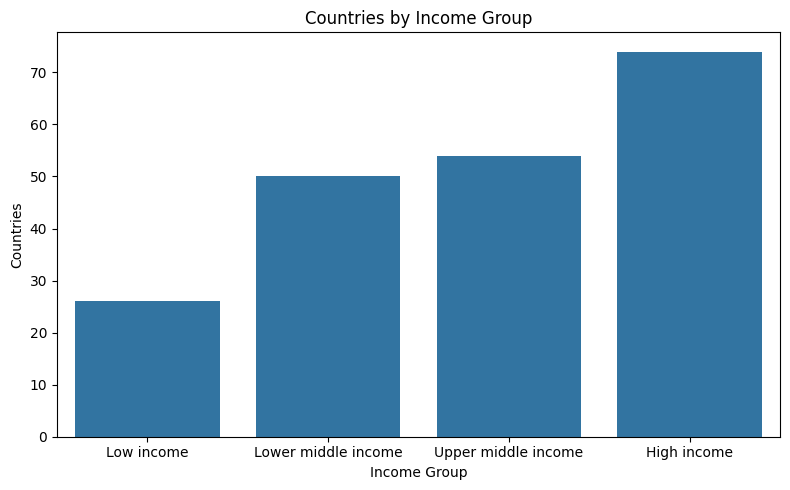

In [123]:
#Define the order
income_order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']

# Count unique countries per income group
unique_country_counts = cleanmerged_df.groupby('income_group')['country'].nunique().reindex(income_order)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=unique_country_counts.index, y=unique_country_counts.values)
plt.title('Countries by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Countries')
plt.tight_layout()
plt.show()

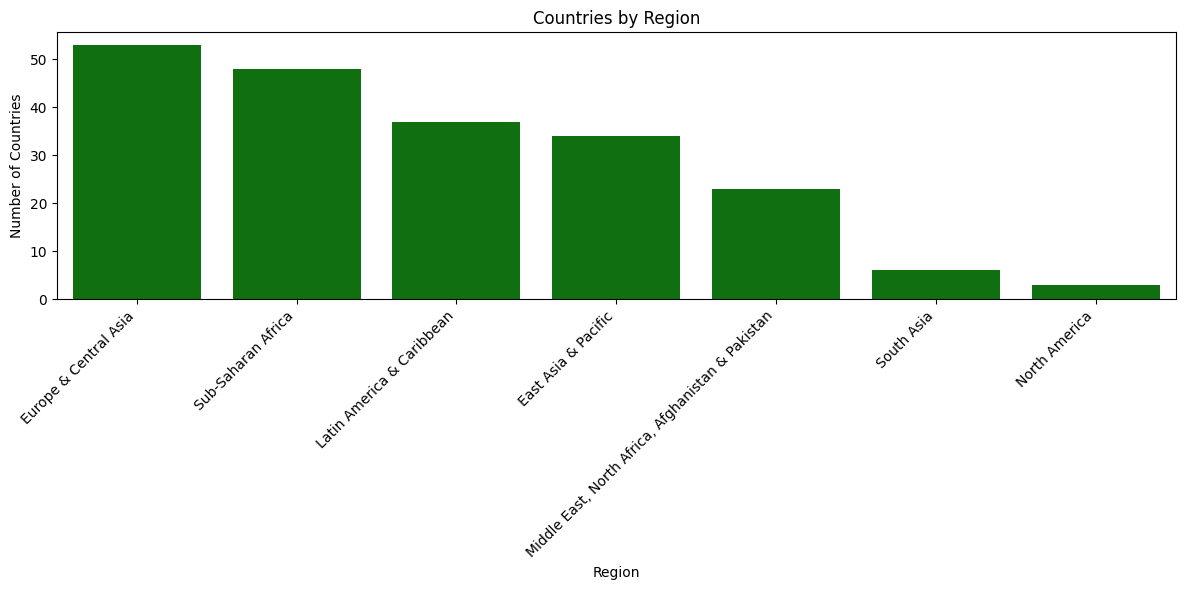

In [124]:
# Count unique countries per region
unique_country_counts_region = cleanmerged_df.groupby('region')['country'].nunique().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_country_counts_region.index, y=unique_country_counts_region.values,color="green")
plt.title('Countries by Region')
plt.xlabel('Region')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

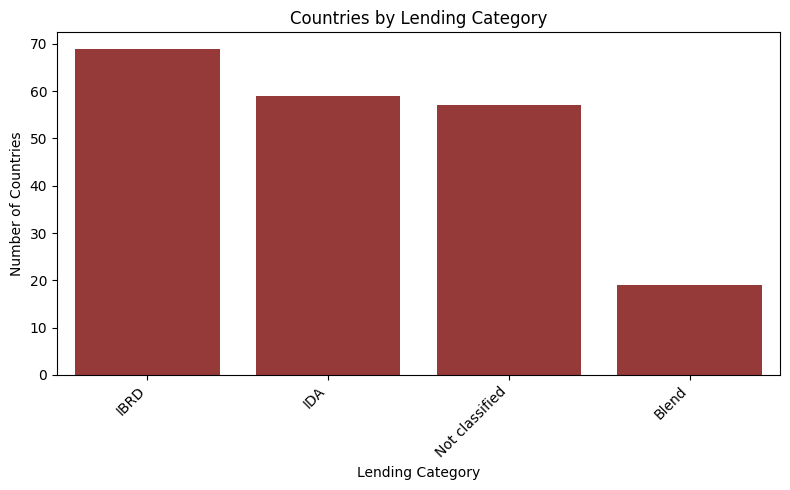

In [125]:
# Count unique countries per lending category
unique_country_counts_lending = cleanmerged_df.groupby('lending_category')['country'].nunique().sort_values(ascending=False)

# Vertical bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=unique_country_counts_lending.index, y=unique_country_counts_lending.values, color="brown")
plt.title('Countries by Lending Category')
plt.xlabel('Lending Category')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Numeric Plots

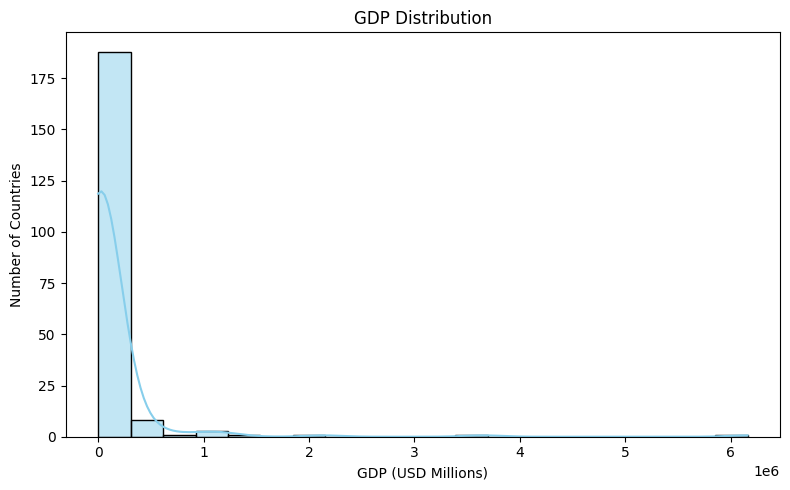

In [126]:
# Take the latest year per country to avoid duplicates over time
latest_year_df = cleanmerged_df.sort_values('year').groupby('country').last().reset_index()

plt.figure(figsize=(8,5))
sns.histplot(latest_year_df['gdp_current_usd_M'], bins=20, kde= True, color='skyblue')
plt.title('GDP Distribution')
plt.xlabel('GDP (USD Millions)')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig('gdp_per_country.png', dpi=300, bbox_inches='tight')  # high quality
plt.close()  # optional, closes the figure to free memory

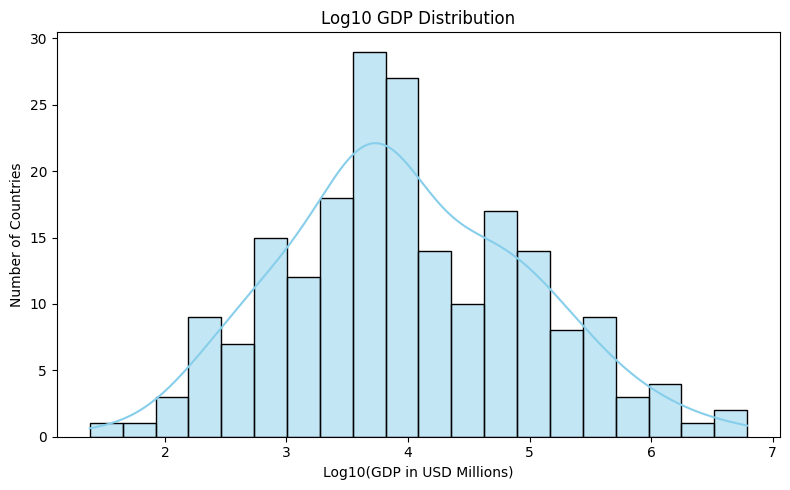

In [127]:
latest_year_df = cleanmerged_df.sort_values('year').groupby('country').last().reset_index()

plt.figure(figsize=(8,5))
sns.histplot(np.log10(latest_year_df['gdp_current_usd_M']),kde= True, bins=20, color='skyblue')
plt.title('Log10 GDP Distribution')
plt.xlabel('Log10(GDP in USD Millions)')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()


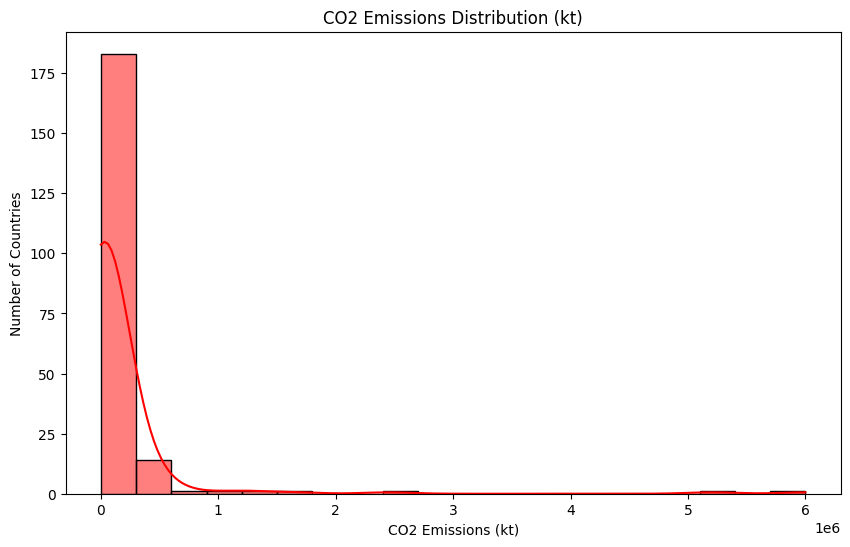

In [128]:
co2_country = cleanmerged_df.groupby('country')['co2_emissions'].mean()

plt.figure(figsize=(10,6))
sns.histplot(co2_country, bins=20, kde=True, color= 'red')
plt.title('CO2 Emissions Distribution (kt)')
plt.xlabel('CO2 Emissions (kt)')
plt.ylabel('Number of Countries')
plt.show()

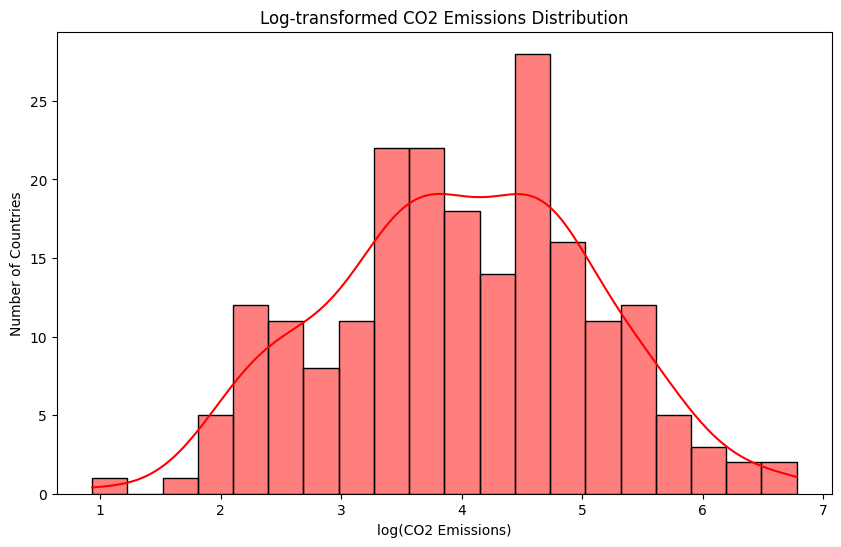

In [129]:
plt.figure(figsize=(10,6))
sns.histplot(np.log10(co2_country), bins=20, kde=True, color= "Red")  
plt.title('Log-transformed CO2 Emissions Distribution')
plt.xlabel('log(CO2 Emissions)')
plt.ylabel('Number of Countries')
plt.show()

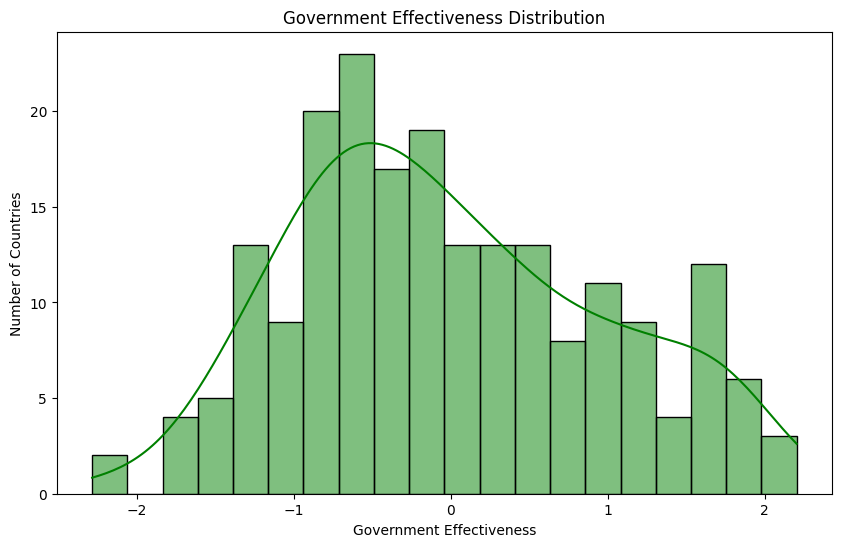

In [130]:
gov_country = cleanmerged_df.groupby('country')['gov_effectiveness_estimate'].mean()

plt.figure(figsize=(10,6))
sns.histplot(gov_country, bins=20, kde=True, color = 'green')
plt.title('Government Effectiveness Distribution')
plt.xlabel('Government Effectiveness')
plt.ylabel('Number of Countries')
plt.show()

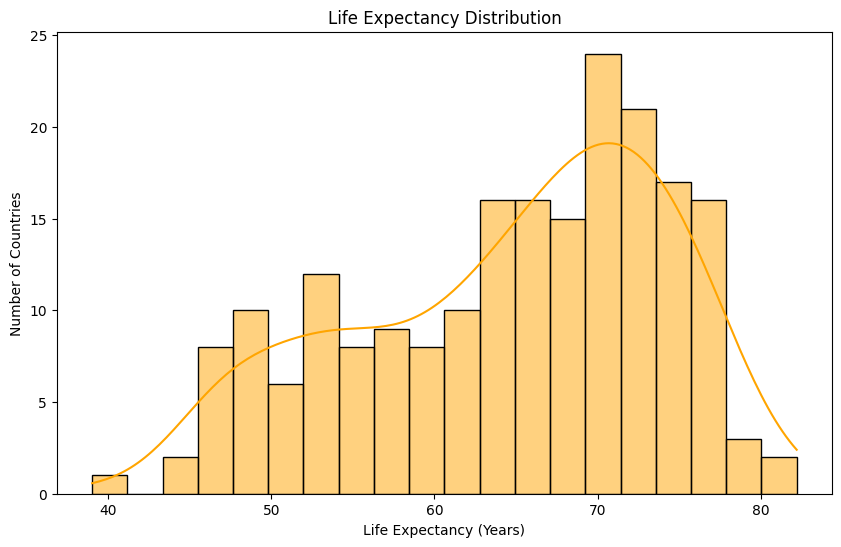

In [131]:
life_country = cleanmerged_df.groupby('country')['life_expectancy_at_birth'].mean()

plt.figure(figsize=(10,6))
sns.histplot(life_country, bins=20, kde=True, color = "orange")
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Number of Countries')
plt.show()


## List of Assumptions:

1. Missing Values
    Region & Income group:
       - If missing, imputed using the most frequent value in the country’s region.
       - For unique cases (like Venezuela), the income group was assigned based on most frequent 
         income in its region.

    Country-specific imputation:
    - For Korea, missing indicators were filled using median values of countries in the same region 
      and closest income group (Lower middle income).
    - Ethiopia’s missing income group was imputed based on its region (Sub-SaharanAfrica) and comparison 
      with similar countries.
    - Countries with no data in 8+ indicators were dropped eg. Gibraltar, St. Martin (French part), 
      French Polynesia

    Lending category:
    - High-income countries with missing lending category values were set as "Not classified".
    - Other countries’ lending category was imputed using the most frequent lending category in the same 
      Region and Income group.

2. Impossible Values

    - Checked that numeric columns cannot have negative values where it doesn’t make sense, e.g., 
      population_density, GDP_current_US, CO2_emissions, tax_revenue%, government_expenditure_on_education%,
      government_health_expenditure%, life_expectancy_at_birth.
    - inflation_annual% had negative values but we assumed that is deflation.

3. Column Selection / Dropping

    - Dropped columns based on:
        Redundancy: Standard deviation columns for governance indicators, duplicate variables.

    - High missingness: 
        Columns with many missing values (e.g., human_capital_index, research_and_development_expenditure%).

    - Irrelevance / complexity: 
        Indicators not directly relevant or technically complex for analysis (e.g., military expenditure, 
        rural population, birth/death rate).

Our assumption is that the remaining columns are sufficient for governance, economic, environmental, and demographic analysis.

4. Data Types

    - Ensured all columns have appropriate data types:
        Numeric for indicators, categorical for Region, Income group, Lending category, etc.


## Categorizing Indicators
For analysis purposes, we decided to keep the following indicators in the assigned categories and then choose from them

### Governance and institutional quality indicators:
 1. goverment_effectiveness_estimate
 2. control_of_corruption_estimate
 3. rule_of_law_estimate
 4. voice_and_accountability_estimate
 5. political_stability_estimate

### Environmental sustainability indicators:
 1. CO2_emisions
 2. renewvable_energy_consumption%
 3. forest_land%
 4. agricultural_land

### Economic performance and poverty reduction indicators
 1. GDP_current_US
 2. inflation_annual%
 3. tax_revenue%

### Human well-being and health indicators:
 1. life_expectancy_at_birth
 2. government_expenditure_on_education%
 3. government_health_expenditure%
 4. access_to_electricity%
 5. population_density

## Environmental Sustainability

--- Analyzing CO2 per capita (metric tons) ---

Summary statistics:
          income_group  count  mean  std  median
0          High income   4736   inf  NaN    9.32
1           Low income   1664  0.50 1.10    0.17
2  Lower middle income   3200  1.50 1.99    0.88
3  Upper middle income   3456  4.55 4.22    3.28


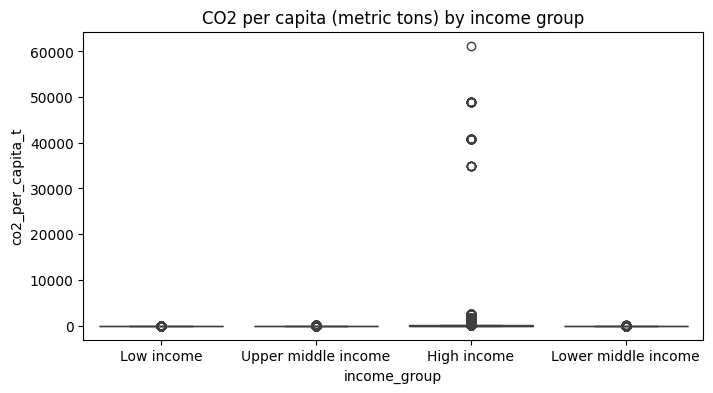

ANOVA failed for co2_per_capita_t: r_matrix performs f_test for using dimensions that are asymptotically non-normal
--- Analyzing Renewable energy (% of consumption) ---

Summary statistics:
          income_group  count  mean   std  median
0          High income   4736 12.43 15.26    6.70
1           Low income   1664 71.55 29.78   84.63
2  Lower middle income   3200 50.94 26.61   51.42
3  Upper middle income   3456 20.45 19.06   15.34


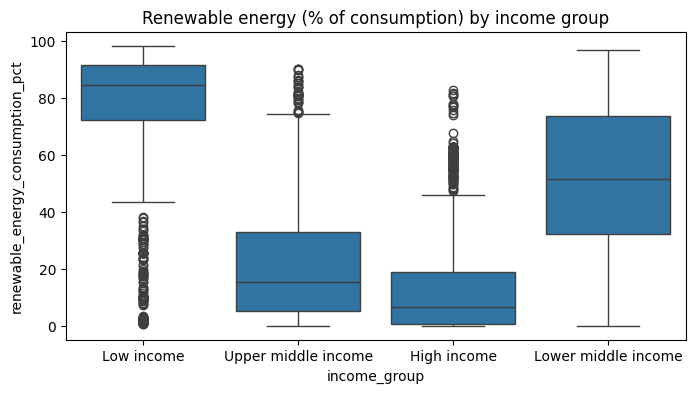


ANOVA table:
                    sum_sq       df       F  PR(>F)
C(income_group) 6022424.37     3.00 4295.29    0.00
Residual        6100066.49 13052.00     NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income     59.11   0.00  57.53  60.70   
1          High income  Lower middle income     38.51   0.00  37.24  39.78   
2          High income  Upper middle income      8.01   0.00   6.77   9.26   
3           Low income  Lower middle income    -20.61   0.00 -22.28 -18.93   
4           Low income  Upper middle income    -51.10   0.00 -52.76 -49.44   
5  Lower middle income  Upper middle income    -30.50   0.00 -31.86 -29.13   

   reject  
0    True  
1    True  
2    True  
3    True  
4    True  
5    True  


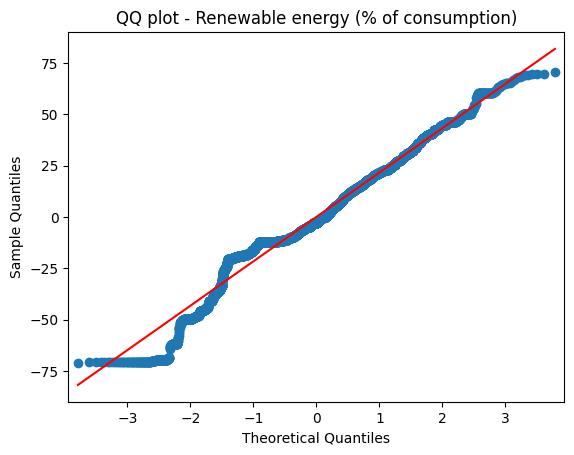

--- Analyzing Forest area (% of land) ---

Summary statistics:
          income_group  count  mean   std  median
0          High income   4736 33.99 24.00   33.18
1           Low income   1664 24.98 22.71   15.74
2  Lower middle income   3200 33.19 26.15   28.98
3  Upper middle income   3456 36.85 24.57   34.88


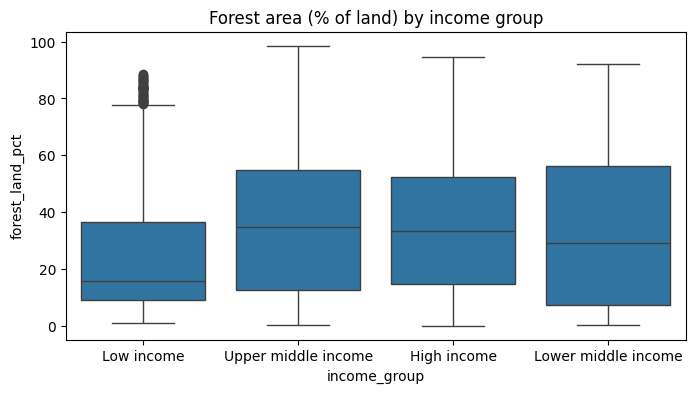


ANOVA table:
                    sum_sq       df     F  PR(>F)
C(income_group)  160893.45     3.00 89.07    0.00
Residual        7858624.57 13052.00   NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income     -9.01   0.00 -10.81  -7.21   
1          High income  Lower middle income     -0.80   0.49  -2.24   0.65   
2          High income  Upper middle income      2.86   0.00   1.45   4.27   
3           Low income  Lower middle income      8.21   0.00   6.31  10.12   
4           Low income  Upper middle income     11.87   0.00   9.99  13.75   
5  Lower middle income  Upper middle income      3.66   0.00   2.11   5.20   

   reject  
0    True  
1   False  
2    True  
3    True  
4    True  
5    True  


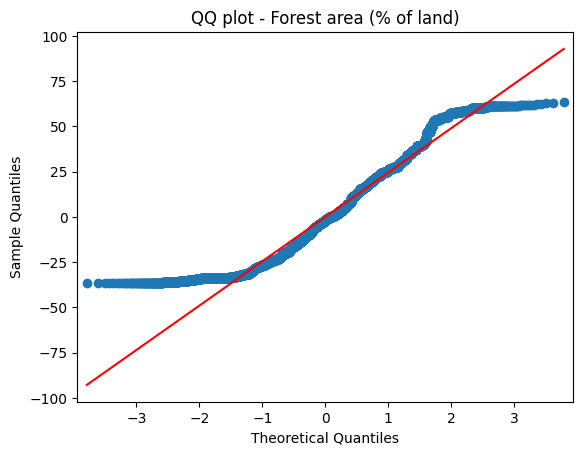

--- Analyzing Agricultural land (% of land) ---

Summary statistics:
          income_group  count  mean   std  median
0          High income   4736 31.89 22.36   28.06
1           Low income   1664 45.60 20.17   44.95
2  Lower middle income   3200 39.78 21.58   38.27
3  Upper middle income   3456 38.80 20.75   40.16


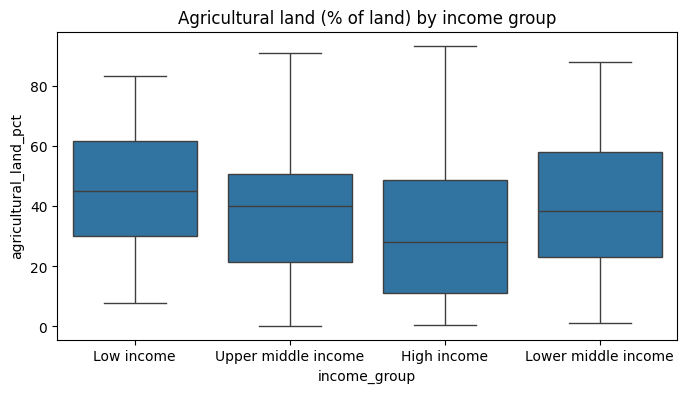


ANOVA table:
                    sum_sq       df      F  PR(>F)
C(income_group)  280624.51     3.00 202.78    0.00
Residual        6020931.68 13052.00    NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income     13.71   0.00  12.14  15.28   
1          High income  Lower middle income      7.89   0.00   6.63   9.15   
2          High income  Upper middle income      6.91   0.00   5.68   8.15   
3           Low income  Lower middle income     -5.82   0.00  -7.49  -4.15   
4           Low income  Upper middle income     -6.80   0.00  -8.45  -5.15   
5  Lower middle income  Upper middle income     -0.98   0.25  -2.33   0.37   

   reject  
0    True  
1    True  
2    True  
3    True  
4    True  
5   False  


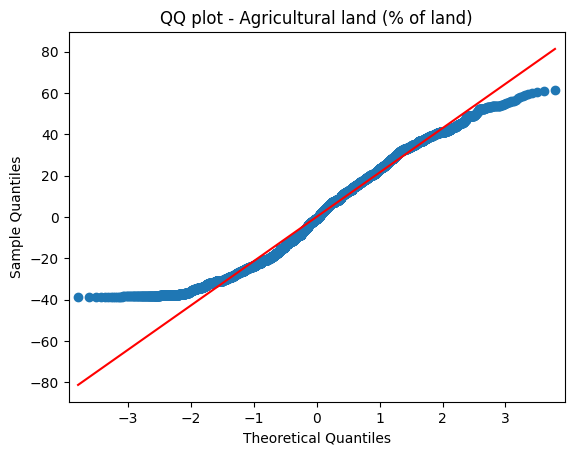

In [132]:
# Compute CO2 per capita
cleanmerged_df['co2_per_capita_t'] = cleanmerged_df['co2_emissions'] / (cleanmerged_df['pop_M']*1000)

# Environmental indicators
indicators = {
    'co2_per_capita_t': 'CO2 per capita (metric tons)',
    'renewable_energy_consumption_pct': 'Renewable energy (% of consumption)',
    'forest_land_pct': 'Forest area (% of land)',
    'agricultural_land_pct': 'Agricultural land (% of land)'
}

results = {}

for col, label in indicators.items():
    print(f"--- Analyzing {label} ---")
    data = cleanmerged_df[['income_group', col]].dropna()

   
    # Making sure that no group has zero variance
    group_counts = data.groupby('income_group')[col].nunique()
    if (group_counts <= 1).any():
        print(f"Skipping {label} — some income groups have zero variance.")
        continue
    
    # Summary stats
    summary = data.groupby('income_group')[col].agg(['count','mean','std','median']).reset_index()
    print("\nSummary statistics:")
    print(summary)
    results[col] = summary
    
    # Boxplot
    plt.figure(figsize=(8,4))
    sns.boxplot(x='income_group', y=col, data=data)
    plt.title(f"{label} by income group")
    plt.show()
    
    # ANOVA
    try:
        model = ols(f'{col} ~ C(income_group)', data=data).fit()
        anova_table = anova_lm(model, typ=2)
        print("\nANOVA table:")
        print(anova_table)
    except Exception as e:
        print(f"ANOVA failed for {col}: {e}")
        continue
    
    # Tukey post-hoc
    try:
        tukey = pairwise_tukeyhsd(endog=data[col], groups=data['income_group'], alpha=0.05)
        tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        print("\nTukey post-hoc results:")
        print(tukey_df)
    except Exception as e:
        print(f"Tukey post-hoc failed for {col}: {e}")
    
    # QQ plot of residuals
    import statsmodels.api as sm
    sm.qqplot(model.resid, line='s')
    plt.title(f"QQ plot - {label}")
    plt.show()

--- Analyzing CO2 per capita (metric tons) ---
  Winsorized range: 0.048 → 1689.773
  Applied log1p transform successfully.

Summary statistics:
          income_group  count  mean  std  median
0          High income   4736  2.77 1.51    2.33
1           Low income   1664  0.29 0.40    0.16
2  Lower middle income   3200  0.75 0.52    0.63
3  Upper middle income   3456  1.51 0.61    1.45


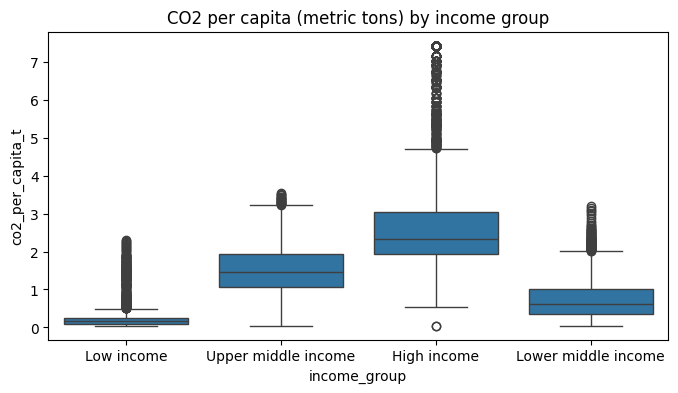


ANOVA table:
                  sum_sq       df       F  PR(>F)
C(income_group) 11663.74     3.00 3850.19    0.00
Residual        13179.89 13052.00     NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income     -2.48   0.00  -2.55  -2.40   
1          High income  Lower middle income     -2.02   0.00  -2.08  -1.96   
2          High income  Upper middle income     -1.26   0.00  -1.32  -1.20   
3           Low income  Lower middle income      0.46   0.00   0.38   0.54   
4           Low income  Upper middle income      1.22   0.00   1.14   1.30   
5  Lower middle income  Upper middle income      0.76   0.00   0.70   0.83   

   reject  
0    True  
1    True  
2    True  
3    True  
4    True  
5    True  


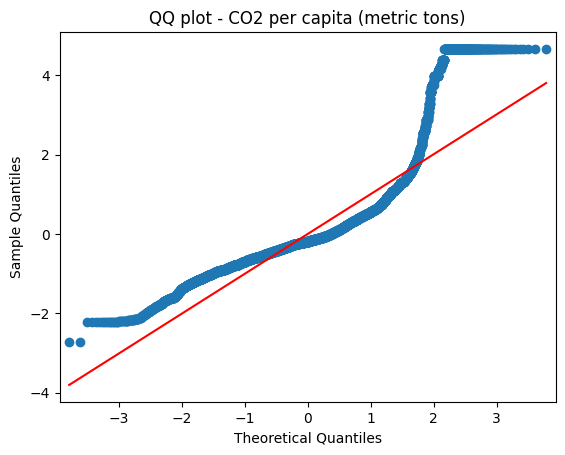

--- Analyzing Renewable energy (% of consumption) ---
  Winsorized range: 0.000 → 94.284
  Applied log1p transform successfully.

Summary statistics:
          income_group  count  mean  std  median
0          High income   4736  1.86 1.32    2.04
1           Low income   1664  4.01 1.03    4.45
2  Lower middle income   3200  3.68 0.95    3.96
3  Upper middle income   3456  2.56 1.14    2.79


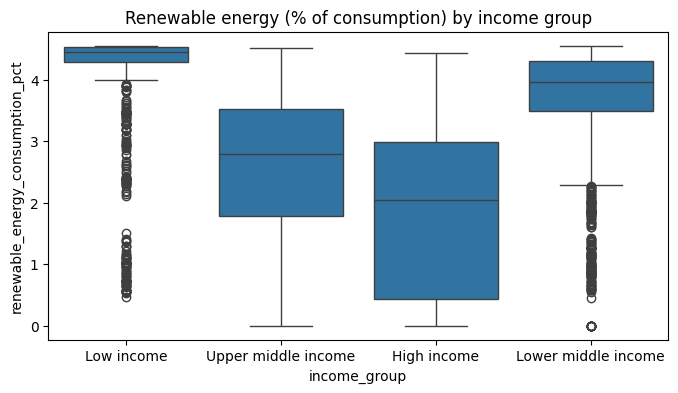


ANOVA table:
                  sum_sq       df       F  PR(>F)
C(income_group)  9317.09     3.00 2331.31    0.00
Residual        17387.43 13052.00     NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income      2.16   0.00   2.07   2.24   
1          High income  Lower middle income      1.82   0.00   1.75   1.89   
2          High income  Upper middle income      0.70   0.00   0.64   0.77   
3           Low income  Lower middle income     -0.34   0.00  -0.43  -0.25   
4           Low income  Upper middle income     -1.45   0.00  -1.54  -1.37   
5  Lower middle income  Upper middle income     -1.12   0.00  -1.19  -1.04   

   reject  
0    True  
1    True  
2    True  
3    True  
4    True  
5    True  


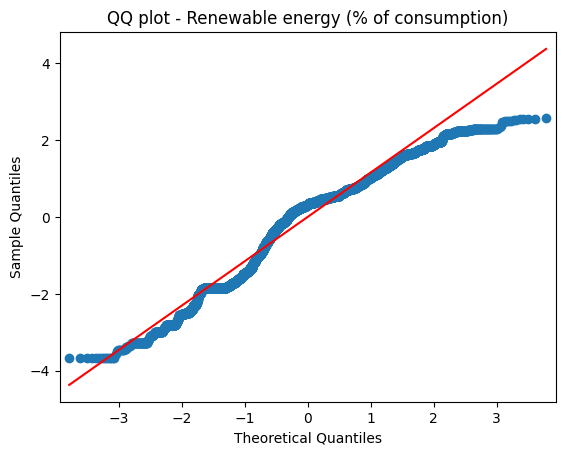

--- Analyzing Forest area (% of land) ---
  Winsorized range: 0.000 → 93.758
  Applied log1p transform successfully.

Summary statistics:
          income_group  count  mean  std  median
0          High income   4736  3.07 1.29    3.53
1           Low income   1664  2.80 1.05    2.82
2  Lower middle income   3200  3.00 1.26    3.40
3  Upper middle income   3456  3.28 1.03    3.58


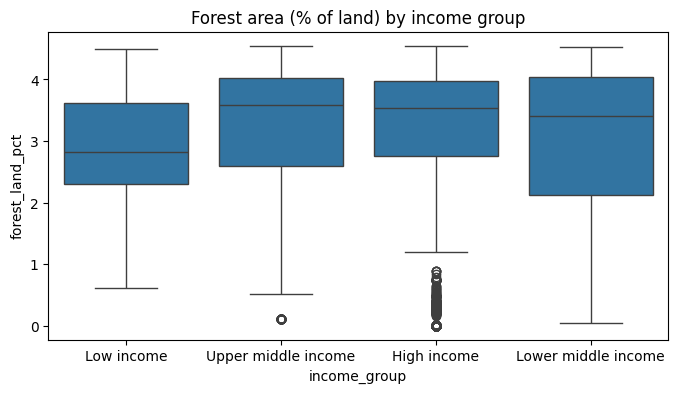


ANOVA table:
                  sum_sq       df     F  PR(>F)
C(income_group)   279.56     3.00 65.81    0.00
Residual        18481.34 13052.00   NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income     -0.26   0.00  -0.35  -0.18   
1          High income  Lower middle income     -0.06   0.10  -0.13   0.01   
2          High income  Upper middle income      0.21   0.00   0.14   0.28   
3           Low income  Lower middle income      0.20   0.00   0.11   0.29   
4           Low income  Upper middle income      0.47   0.00   0.38   0.56   
5  Lower middle income  Upper middle income      0.27   0.00   0.20   0.35   

   reject  
0    True  
1   False  
2    True  
3    True  
4    True  
5    True  


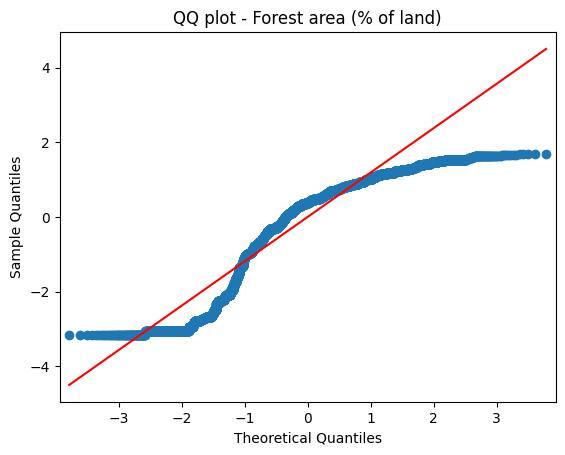

--- Analyzing Agricultural land (% of land) ---
  Winsorized range: 0.920 → 81.594
  Applied log1p transform successfully.

Summary statistics:
          income_group  count  mean  std  median
0          High income   4736  3.15 0.94    3.37
1           Low income   1664  3.71 0.57    3.83
2  Lower middle income   3200  3.48 0.80    3.67
3  Upper middle income   3456  3.48 0.74    3.72


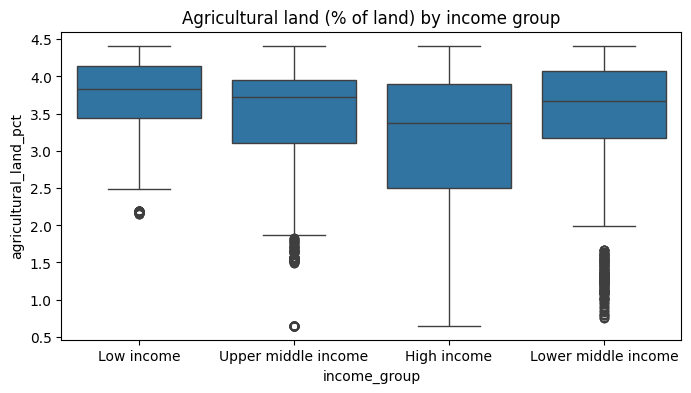


ANOVA table:
                 sum_sq       df      F  PR(>F)
C(income_group)  487.16     3.00 244.87    0.00
Residual        8655.55 13052.00    NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income      0.55   0.00   0.49   0.61   
1          High income  Lower middle income      0.33   0.00   0.28   0.37   
2          High income  Upper middle income      0.33   0.00   0.28   0.37   
3           Low income  Lower middle income     -0.23   0.00  -0.29  -0.16   
4           Low income  Upper middle income     -0.23   0.00  -0.29  -0.16   
5  Lower middle income  Upper middle income      0.00   1.00  -0.05   0.05   

   reject  
0    True  
1    True  
2    True  
3    True  
4    True  
5   False  


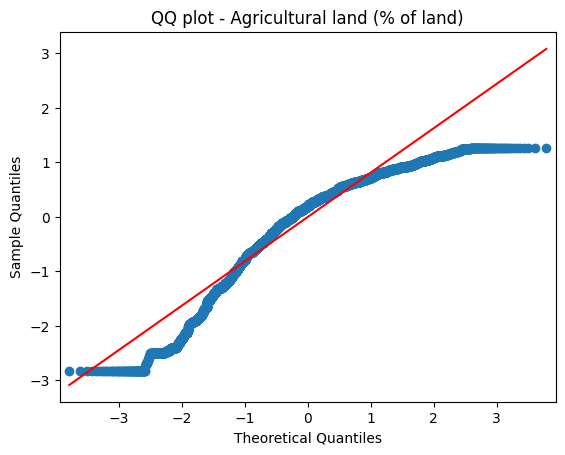

In [133]:
# Compute CO2 per capita
cleanmerged_df['co2_per_capita_t'] = cleanmerged_df['co2_emissions'] / (cleanmerged_df['pop_M']*1000)

# Environmental indicators
indicators = {
    'co2_per_capita_t': 'CO2 per capita (metric tons)',
    'renewable_energy_consumption_pct': 'Renewable energy (% of consumption)',
    'forest_land_pct': 'Forest area (% of land)',
    'agricultural_land_pct': 'Agricultural land (% of land)'
}

results = {}

for col, label in indicators.items():
    print(f"--- Analyzing {label} ---")
    data = cleanmerged_df[['income_group', col]].dropna()

    #CO2 Cleaning

    # Winsorization (remove extreme outliers)
    lower = data[col].quantile(0.01)
    upper = data[col].quantile(0.99)
    data[col] = data[col].clip(lower=lower, upper=upper)
    print(f"  Winsorized range: {lower:.3f} → {upper:.3f}")

    # Safe log1p transform (includes zeros)
    data[col] = np.log1p(data[col])

    # Replace infinite values and drop NA
    data = data.replace([np.inf, -np.inf], np.nan).dropna()
    print("  Applied log1p transform successfully.")

   
    # Making sure that no group has zero variance
    group_counts = data.groupby('income_group')[col].nunique()
    if (group_counts <= 1).any():
        print(f"Skipping {label} — some income groups have zero variance.")
        continue
    
    # Summary stats
    summary = data.groupby('income_group')[col].agg(['count','mean','std','median']).reset_index()
    print("\nSummary statistics:")
    print(summary)
    results[col] = summary
    
    # Boxplot
    plt.figure(figsize=(8,4))
    sns.boxplot(x='income_group', y=col, data=data)
    plt.title(f"{label} by income group")
    plt.show()
    
    # ANOVA
    try:
        model = ols(f'{col} ~ C(income_group)', data=data).fit()
        anova_table = anova_lm(model, typ=2)
        print("\nANOVA table:")
        print(anova_table)
    except Exception as e:
        print(f"ANOVA failed for {col}: {e}")
        continue
    
    # Tukey post-hoc
    try:
        tukey = pairwise_tukeyhsd(endog=data[col], groups=data['income_group'], alpha=0.05)
        tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        print("\nTukey post-hoc results:")
        print(tukey_df)
    except Exception as e:
        print(f"Tukey post-hoc failed for {col}: {e}")
    
    # QQ plot of residuals
    import statsmodels.api as sm
    sm.qqplot(model.resid, line='s')
    plt.title(f"QQ plot - {label}")
    plt.show()

In [135]:
story_lines = []
story_lines.append("Environmental Sustainability Story")
story_lines.append("="*60)
story_lines.append("This section shows observations of environmental sustainability across income groups.\n")

for col, label in indicators.items():
    summary = results.get(col)
    if summary is None:
        continue
    story_lines.append(f"{label}:")
    group_stats = "; ".join([f"{row['income_group']}: mean={row['mean']:.2f} (n={int(row['count'])})" 
                             for _, row in summary.iterrows()])
    story_lines.append(f"  By income group — {group_stats}.\n")

story_lines.append("="*60)

summary_text = """
Summary of Environmental Sustainability Across Income Groups:

- High-income countries:
    • Emit the most CO2 per capita due to industrialization, high energy consumption, and reliance on fossil fuels.

- Low-income countries:
    • Have the lowest CO2 per capita because of limited industrial activity and low energy consumption.
    • Exhibit the highest share of agricultural land, reflecting dependence on subsistence farming.

- Middle-income countries (Lower-Middle and Upper-Middle):
    • Show transitional patterns: CO2 per capita, renewable energy share, and land use fall between the extremes of low- and high-income groups.

Overall Interpretation:
Environmental pressures and resource utilization vary systematically with income level. High-income countries face climate impacts due to high CO2 emissions, low-income countries depend on natural resources, and middle-income countries are in transition. These patterns highlight the need for income-specific sustainability policies and interventions.
"""

story_lines.append(summary_text)

# Print storytelling draft
print("\n" + "\n".join(story_lines))


Environmental Sustainability Story
This section shows observations of environmental sustainability across income groups.

CO2 per capita (metric tons):
  By income group — High income: mean=2.77 (n=4736); Low income: mean=0.29 (n=1664); Lower middle income: mean=0.75 (n=3200); Upper middle income: mean=1.51 (n=3456).

Renewable energy (% of consumption):
  By income group — High income: mean=1.86 (n=4736); Low income: mean=4.01 (n=1664); Lower middle income: mean=3.68 (n=3200); Upper middle income: mean=2.56 (n=3456).

Forest area (% of land):
  By income group — High income: mean=3.07 (n=4736); Low income: mean=2.80 (n=1664); Lower middle income: mean=3.00 (n=3200); Upper middle income: mean=3.28 (n=3456).

Agricultural land (% of land):
  By income group — High income: mean=3.15 (n=4736); Low income: mean=3.71 (n=1664); Lower middle income: mean=3.48 (n=3200); Upper middle income: mean=3.48 (n=3456).


Summary of Environmental Sustainability Across Income Groups:

- High-income coun